# **Data Preprocessing and Model Notebook**

This is the notebook for the data preprocessing and model in stock prediction. In this notebook I will be extracting data, train it, and fit it in the model.

In [ ]:
# Importing the Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Downgrading Pandas version to work with some inbuilt libraries
pip install pandas==1.5.0

In [ ]:
import pandas_datareader as pdr

### Collecting Data using API key from Tiingo
#### https://www.tiingo.com/

In [ ]:
# Collecting Stock Data from tiingo using API Key
df = pdr.get_data_tiingo('AAPL',  api_key='7a26b9f89a02a2588115a0209c51f656785bf236')
df.head()

<ipython-input-169-bc5c14f25854>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL',  api_key='7a26b9f89a02a2588115a0209c51f656785bf236')


close    high     low    open    volume  \
symbol date                                                                  
AAPL   2019-05-29 00:00:00+00:00  177.38  179.35  176.00  176.42  28481165   
       2019-05-30 00:00:00+00:00  178.30  179.23  176.67  177.95  21218412   
       2019-05-31 00:00:00+00:00  175.07  177.99  174.99  176.23  27043584   
       2019-06-03 00:00:00+00:00  173.30  177.92  170.27  175.60  40396069   
       2019-06-04 00:00:00+00:00  179.64  179.83  174.52  175.44  30967961   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2019-05-29 00:00:00+00:00  42.797804  43.273120  42.464841  42.566177   
       2019-05-30 00:00:00+00:00  43.019779  43.244167  42.626497  42.935332   
       2019-05-31 00:00:00+00:00  42.240452  42.944983  42.221150  42.520334   
       2019-06-03 00:00:00+00:00  41.813391  42.928093  41.082320  42.368330   
       2019-06-04 00:00:00+00:00  43.343091  43.388933  42.107750  42.329725   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2019-05-29 00:00:00+00:00  113924660      0.0          1.0  
       2019-05-30 00:00:00+00:00   84873648      0.0          1.0  
       2019-05-31 00:00:00+00:00  108174336      0.0          1.0  
       2019-06-03 00:00:00+00:00  161584276      0.0          1.0  
       2019-06-04 00:00:00+00:00  123871844      0.0          1.0

In [ ]:
df.tail()

close      high       low     open  \
symbol date                                                             
AAPL   2024-05-20 00:00:00+00:00  191.04  191.9199  189.0100  189.325   
       2024-05-21 00:00:00+00:00  192.35  192.7300  190.9201  191.090   
       2024-05-22 00:00:00+00:00  190.90  192.8231  190.2700  192.265   
       2024-05-23 00:00:00+00:00  186.88  191.0000  186.6250  190.980   
       2024-05-24 00:00:00+00:00  189.98  190.5800  188.0404  188.820   

                                    volume  adjClose   adjHigh    adjLow  \
symbol date                                                                
AAPL   2024-05-20 00:00:00+00:00  44361275    191.04  191.9199  189.0100   
       2024-05-21 00:00:00+00:00  42309401    192.35  192.7300  190.9201   
       2024-05-22 00:00:00+00:00  34648547    190.90  192.8231  190.2700   
       2024-05-23 00:00:00+00:00  51005924    186.88  191.0000  186.6250   
       2024-05-24 00:00:00+00:00  36326975    189.98  190.5800  188.0404   

                                  adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                 
AAPL   2024-05-20 00:00:00+00:00  189.325   44361275      0.0          1.0  
       2024-05-21 00:00:00+00:00  191.090   42309401      0.0          1.0  
       2024-05-22 00:00:00+00:00  192.265   34648547      0.0          1.0  
       2024-05-23 00:00:00+00:00  190.980   51005924      0.0          1.0  
       2024-05-24 00:00:00+00:00  188.820   36326975      0.0          1.0

In [ ]:
# Reseting the Index Values
df = df.reset_index()
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-05-29 00:00:00+00:00,177.38,179.35,176.00,176.42,28481165,42.797804,43.273120,42.464841,42.566177,113924660,0.0,1.0
1,AAPL,2019-05-30 00:00:00+00:00,178.30,179.23,176.67,177.95,21218412,43.019779,43.244167,42.626497,42.935332,84873648,0.0,1.0
2,AAPL,2019-05-31 00:00:00+00:00,175.07,177.99,174.99,176.23,27043584,42.240452,42.944983,42.221150,42.520334,108174336,0.0,1.0
3,AAPL,2019-06-03 00:00:00+00:00,173.30,177.92,170.27,175.60,40396069,41.813391,42.928093,41.082320,42.368330,161584276,0.0,1.0
4,AAPL,2019-06-04 00:00:00+00:00,179.64,179.83,174.52,175.44,30967961,43.343091,43.388933,42.107750,42.329725,123871844,0.0,1.0


### Dropping down the headers which we don't need for this model

In [ ]:
df = df.drop(['date','adjClose','adjHigh','adjLow','adjOpen','adjVolume','divCash','splitFactor'], axis = 1)
df.head()

,symbol,close,high,low,open,volume
0,AAPL,177.38,179.35,176.00,176.42,28481165
1,AAPL,178.30,179.23,176.67,177.95,21218412
2,AAPL,175.07,177.99,174.99,176.23,27043584
3,AAPL,173.30,177.92,170.27,175.60,40396069
4,AAPL,179.64,179.83,174.52,175.44,30967961


### Plotting the closing price of the data

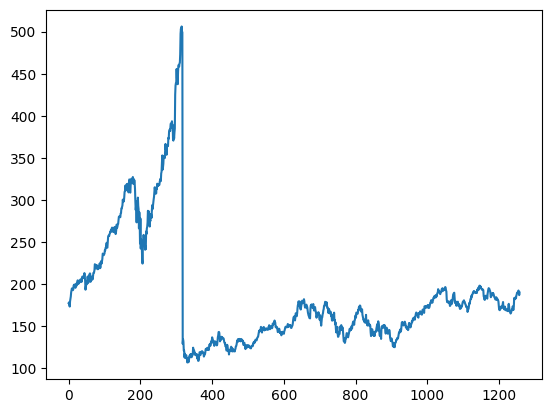

In [ ]:
plt.plot(df.close)

In [ ]:
df

,symbol,close,high,low,open,volume
0,AAPL,177.38,179.3500,176.0000,176.420,28481165
1,AAPL,178.30,179.2300,176.6700,177.950,21218412
2,AAPL,175.07,177.9900,174.9900,176.230,27043584
3,AAPL,173.30,177.9200,170.2700,175.600,40396069
4,AAPL,179.64,179.8300,174.5200,175.440,30967961
...,...,...,...,...,...,...
1253,AAPL,191.04,191.9199,189.0100,189.325,44361275
1254,AAPL,192.35,192.7300,190.9201,191.090,42309401
1255,AAPL,190.90,192.8231,190.2700,192.265,34648547
1256,AAPL,186.88,191.0000,186.6250,190.980,51005924


### Getting Moving Average 100 using rolling

In [ ]:
ma100 = df.close.rolling(100).mean()

In [ ]:
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1253    179.7657
1254    179.7577
1255    179.7309
1256    179.6744
1257    179.7178
Name: close, Length: 1258, dtype: float64

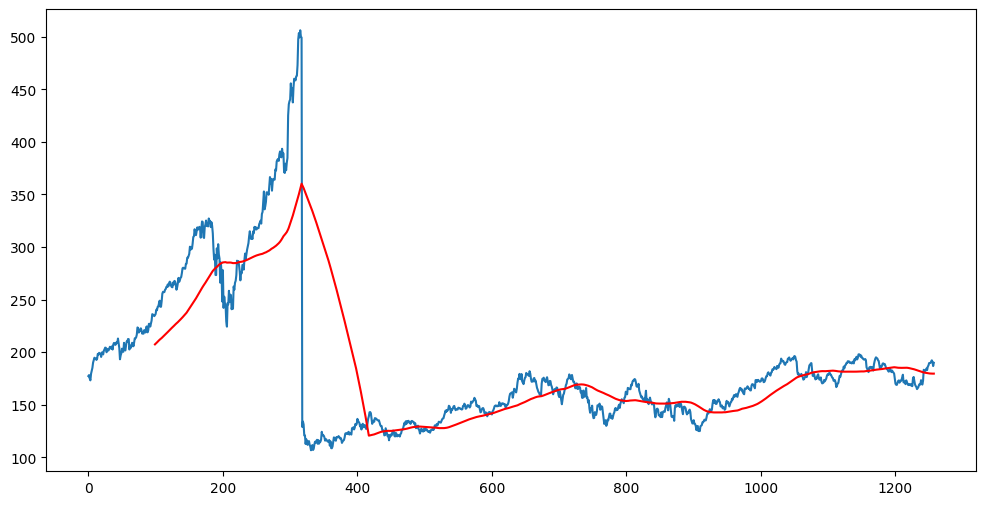

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.close)
plt.plot(ma100,'r')

### Getting Moving Average 200

In [ ]:
ma200 = df.close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1253    180.77640
1254    180.82820
1255    180.88845
1256    180.92385
1257    180.98280
Name: close, Length: 1258, dtype: float64

### Plotting both MA100 and MA200 with original data

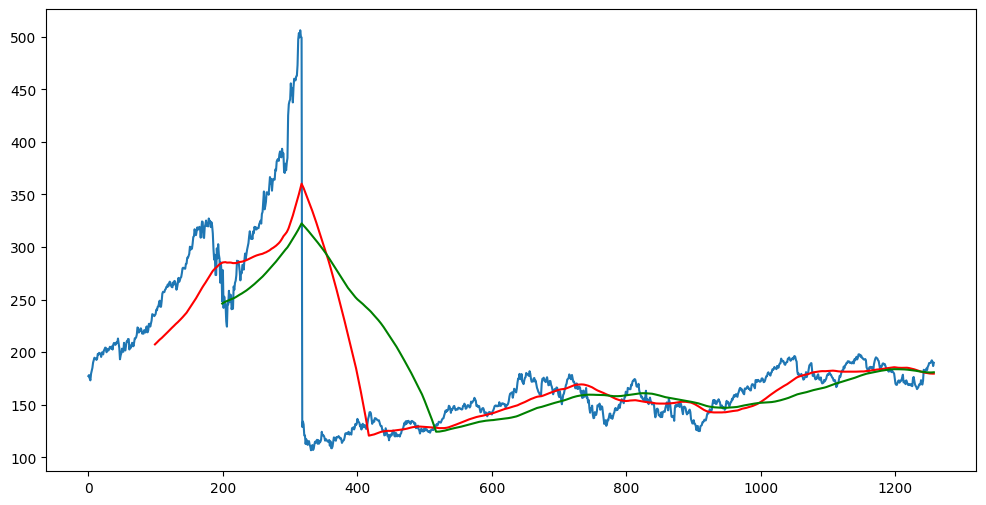

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [ ]:
df.shape

(1258, 6)

## Splitting Data into Train and Test

In [ ]:
#Splitting Data into Training and Testing

data_training = pd.DataFrame(df['close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(880, 1)
(378, 1)


In [ ]:
data_training.head()

,close
0,177.38
1,178.30
2,175.07
3,173.30
4,179.64


In [ ]:
data_testing.head()

,close
880,150.18
881,151.07
882,148.11
883,144.22
884,141.17


### Scaling the Data for our LSTM model

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[1.76681277e-01],
       [1.78985598e-01],
       [1.70895429e-01],
       [1.66462116e-01],
       [1.82341891e-01],
       [1.89605510e-01],
       [1.96318096e-01],
       [2.08666249e-01],
       [2.14752661e-01],
       [2.20338134e-01],
       [2.18785222e-01],
       [2.18685034e-01],
       [2.15153413e-01],
       [2.18033813e-01],
       [2.29455229e-01],
       [2.28002505e-01],
       [2.31984972e-01],
       [2.30281778e-01],
       [2.29780839e-01],
       [2.22241703e-01],
       [2.32836569e-01],
       [2.32686287e-01],
       [2.28127740e-01],
       [2.37219787e-01],
       [2.40175329e-01],
       [2.44383219e-01],
       [2.43932373e-01],
       [2.33387602e-01],
       [2.36443331e-01],
       [2.41427677e-01],
       [2.37720726e-01],
       [2.41603006e-01],
       [2.46386976e-01],
       [2.44608641e-01],
       [2.41728240e-01],
       [2.47514089e-01],
       [2.39824671e-01],
       [2.51421415e-01],
       [2.55479023e-01],
       [2.55053225e-01],


### Creating List of x_train and y_train from the dataset for first 100 days

In [ ]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(780, 100, 1)

# **Creating the Model**

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_12 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_13 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_13 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_14 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_14 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_15 (LSTM)              (None, 120)              

### Running the Model

In [ ]:
model.compile(optimizer = 'adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
25/25 [==============================] - 20s 556ms/step - loss: 0.0440
Epoch 2/50
25/25 [==============================] - 15s 594ms/step - loss: 0.0228
Epoch 3/50
25/25 [==============================] - 10s 375ms/step - loss: 0.0163
Epoch 4/50
25/25 [==============================] - 7s 269ms/step - loss: 0.0120
Epoch 5/50
25/25 [==============================] - 8s 317ms/step - loss: 0.0118
Epoch 6/50
25/25 [==============================] - 6s 254ms/step - loss: 0.0103
Epoch 7/50
25/25 [==============================] - 8s 317ms/step - loss: 0.0087
Epoch 8/50
25/25 [==============================] - 6s 254ms/step - loss: 0.0077
Epoch 9/50
25/25 [==============================] - 8s 332ms/step - loss: 0.0076
Epoch 10/50
25/25 [==============================] - 6s 253ms/step - loss: 0.0068
Epoch 11/50
25/25 [==============================] - 8s 326ms/step - loss: 0.0078
Epoch 12/50
25/25 [==============================] - 6s 254ms/step - loss: 0.0071
Epoch 13/50
25/25 [===

In [ ]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
data_testing.head()

,close
880,150.18
881,151.07
882,148.11
883,144.22
884,141.17


### For predicting the value, we need previous 100 days, so fetching the data and appending it

In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_testing, ignore_index=True)

<ipython-input-195-27e824f269e9>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [ ]:
final_df.head()

,close
0,138.93
1,141.56
2,142.92
3,146.35
4,147.04


### Scaling the input data

In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[1.90313312e-01],
       [2.26296347e-01],
       [2.44903544e-01],
       [2.91831988e-01],
       [3.01272404e-01],
       [2.71582980e-01],
       [2.85127924e-01],
       [2.80065672e-01],
       [3.20837324e-01],
       [3.44096320e-01],
       [3.01682857e-01],
       [3.55452182e-01],
       [3.83362977e-01],
       [4.14967848e-01],
       [3.97728827e-01],
       [3.82131619e-01],
       [3.63661240e-01],
       [4.34669585e-01],
       [4.42331372e-01],
       [5.12929265e-01],
       [4.99247503e-01],
       [4.78724860e-01],
       [5.62457244e-01],
       [5.58079081e-01],
       [5.51785470e-01],
       [5.45218224e-01],
       [5.45902312e-01],
       [6.05007525e-01],
       [5.94746203e-01],
       [6.44137365e-01],
       [6.59050486e-01],
       [6.56861404e-01],
       [6.77657682e-01],
       [6.72184977e-01],
       [6.36201943e-01],
       [5.82158982e-01],
       [5.77507183e-01],
       [5.81611712e-01],
       [6.15816117e-01],
       [5.28116021e-01],


In [ ]:
input_data.shape

(478, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test =np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(378, 100, 1)
(378,)


### Making the Model to Predict

In [ ]:
# Making Predictions
y_predicted = model.predict(x_test)

12/12 [==============================] - 2s 115ms/step


In [ ]:
y_predicted.shape

(378, 1)

In [ ]:
y_test

array([3.44233137e-01, 3.56409906e-01, 3.15911889e-01, 2.62689834e-01,
       2.20960460e-01, 3.14817348e-01, 3.18648242e-01, 3.11807361e-01,
       2.95662881e-01, 2.44766726e-01, 2.17813654e-01, 2.41209468e-01,
       2.34505404e-01, 2.66383910e-01, 2.79792037e-01, 2.48871255e-01,
       1.57066630e-01, 1.29839923e-01, 1.00560952e-01, 9.96032289e-02,
       1.42700780e-01, 9.86455055e-02, 9.35832535e-02, 6.85456287e-02,
       1.39553975e-02, 6.27992885e-02, 6.71774525e-02, 6.84088111e-04,
       1.83335614e-02, 0.00000000e+00, 6.29361062e-02, 7.01874401e-02,
       7.81228622e-02, 1.15884526e-01, 1.14789985e-01, 1.33260364e-01,
       1.49404843e-01, 1.39417157e-01, 1.40238063e-01, 1.75810644e-01,
       2.20139554e-01, 2.39567656e-01, 2.30400876e-01, 2.59132576e-01,
       2.86085648e-01, 2.45998085e-01, 2.63647558e-01, 2.79244767e-01,
       3.52989465e-01, 4.03338350e-01, 3.65439869e-01, 4.05390614e-01,
       3.68039403e-01, 3.53673553e-01, 3.55589000e-01, 3.94445205e-01,
      

In [ ]:
y_predicted

array([[0.2108733 ],
       [0.23224345],
       [0.25375882],
       [0.27378994],
       [0.2899647 ],
       [0.2975427 ],
       [0.29802972],
       [0.29561996],
       [0.29345924],
       [0.292655  ],
       [0.29141265],
       [0.28722778],
       [0.2803098 ],
       [0.27135408],
       [0.26291013],
       [0.25721937],
       [0.25434396],
       [0.24985744],
       [0.23897669],
       [0.21965045],
       [0.19569944],
       [0.17434807],
       [0.15705809],
       [0.14391193],
       [0.13416538],
       [0.12623079],
       [0.11959348],
       [0.11406779],
       [0.10901555],
       [0.10421155],
       [0.09944991],
       [0.09531915],
       [0.09232239],
       [0.09063444],
       [0.09020942],
       [0.09054635],
       [0.09161665],
       [0.09338486],
       [0.09572462],
       [0.09850898],
       [0.10169818],
       [0.10605033],
       [0.112295  ],
       [0.12020158],
       [0.12914042],
       [0.13962804],
       [0.15217383],
       [0.165

### Finding the factor by which the all the values are scaled down

In [ ]:
scaler = scaler.scale_

array([0.01368176])

In [ ]:
scale_factor = 1/scaler[0]
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

### **Plotting the Original Price vs Predicted Price**

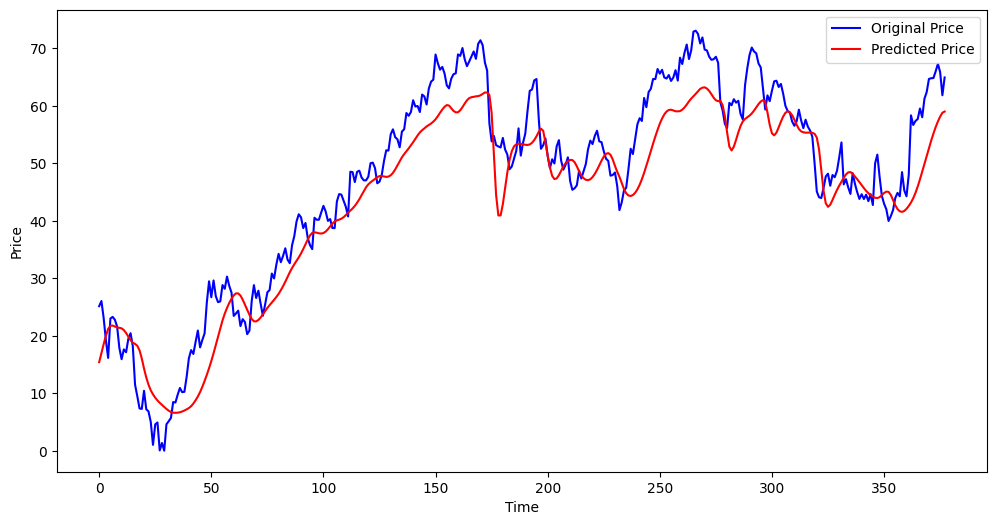

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()